In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/mac/Desktop/datasets/archive (2)/customer_churn_dataset-training-master.csv')
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [3]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 440833
Number of columns: 12


In [4]:
df.columns.tolist()

['CustomerID',
 'Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [5]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
# Basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


In [7]:
# Check for missing values
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [8]:
# remove missing values
df.dropna(inplace=True)

In [9]:
# Class distribution (Churn)
df['Churn'].value_counts(normalize=True)

Churn
1.0    0.567107
0.0    0.432893
Name: proportion, dtype: float64

In [10]:
# Correlation analysis for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

In [11]:
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)
churn_correlations

Churn               1.000000
Support Calls       0.574267
Payment Delay       0.312129
Age                 0.218394
Last Interaction    0.149616
Usage Frequency    -0.046101
Tenure             -0.051919
Total Spend        -0.429355
CustomerID         -0.839365
Name: Churn, dtype: float64

In [12]:
print("\nAverage total spend by subscription type:")
df.groupby('Subscription Type')['Total Spend'].mean().sort_values()


Average total spend by subscription type:


Subscription Type
Basic       628.673496
Premium     632.926463
Standard    633.132253
Name: Total Spend, dtype: float64

In [13]:
# Data Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

Text(0, 0.5, 'Age')

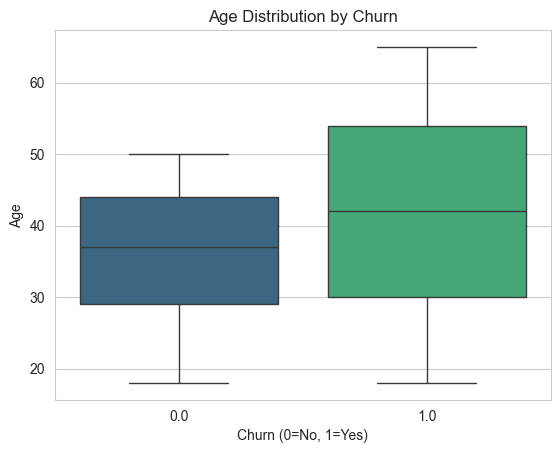

In [14]:
# Age Distribution by Churn
sns.boxplot(x='Churn', y='Age', data=df, palette='viridis')
plt.title('Age Distribution by Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Age')

Text(0, 0.5, 'Total Spend')

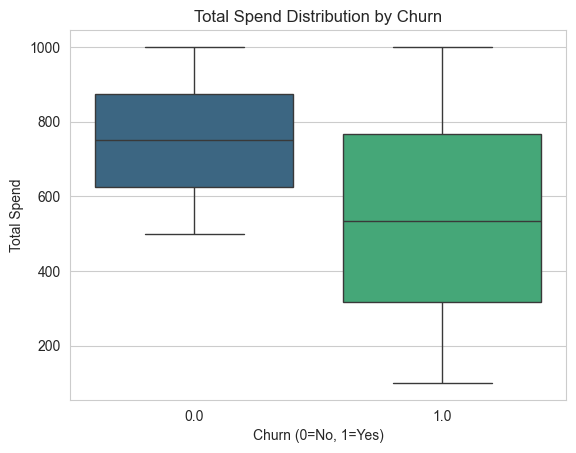

In [15]:
# Total Spend by Churn
sns.boxplot(x='Churn', y='Total Spend', data=df, palette='viridis')
plt.title('Total Spend Distribution by Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Total Spend')

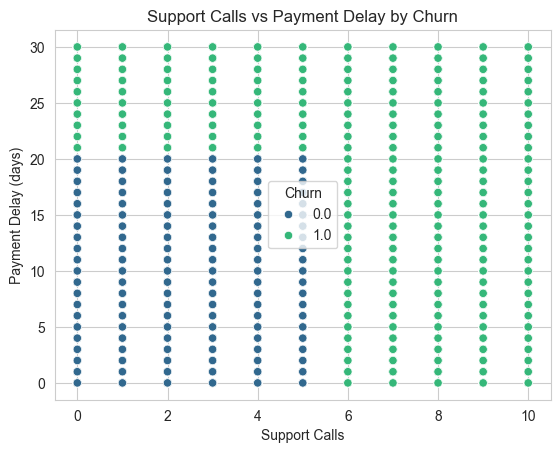

In [16]:
# Support Calls vs Payment Delay by Churn
sns.scatterplot(x='Support Calls', y='Payment Delay', hue='Churn', data=df, palette='viridis')
plt.title('Support Calls vs Payment Delay by Churn')
plt.xlabel('Support Calls')
plt.ylabel('Payment Delay (days)')
plt.show()

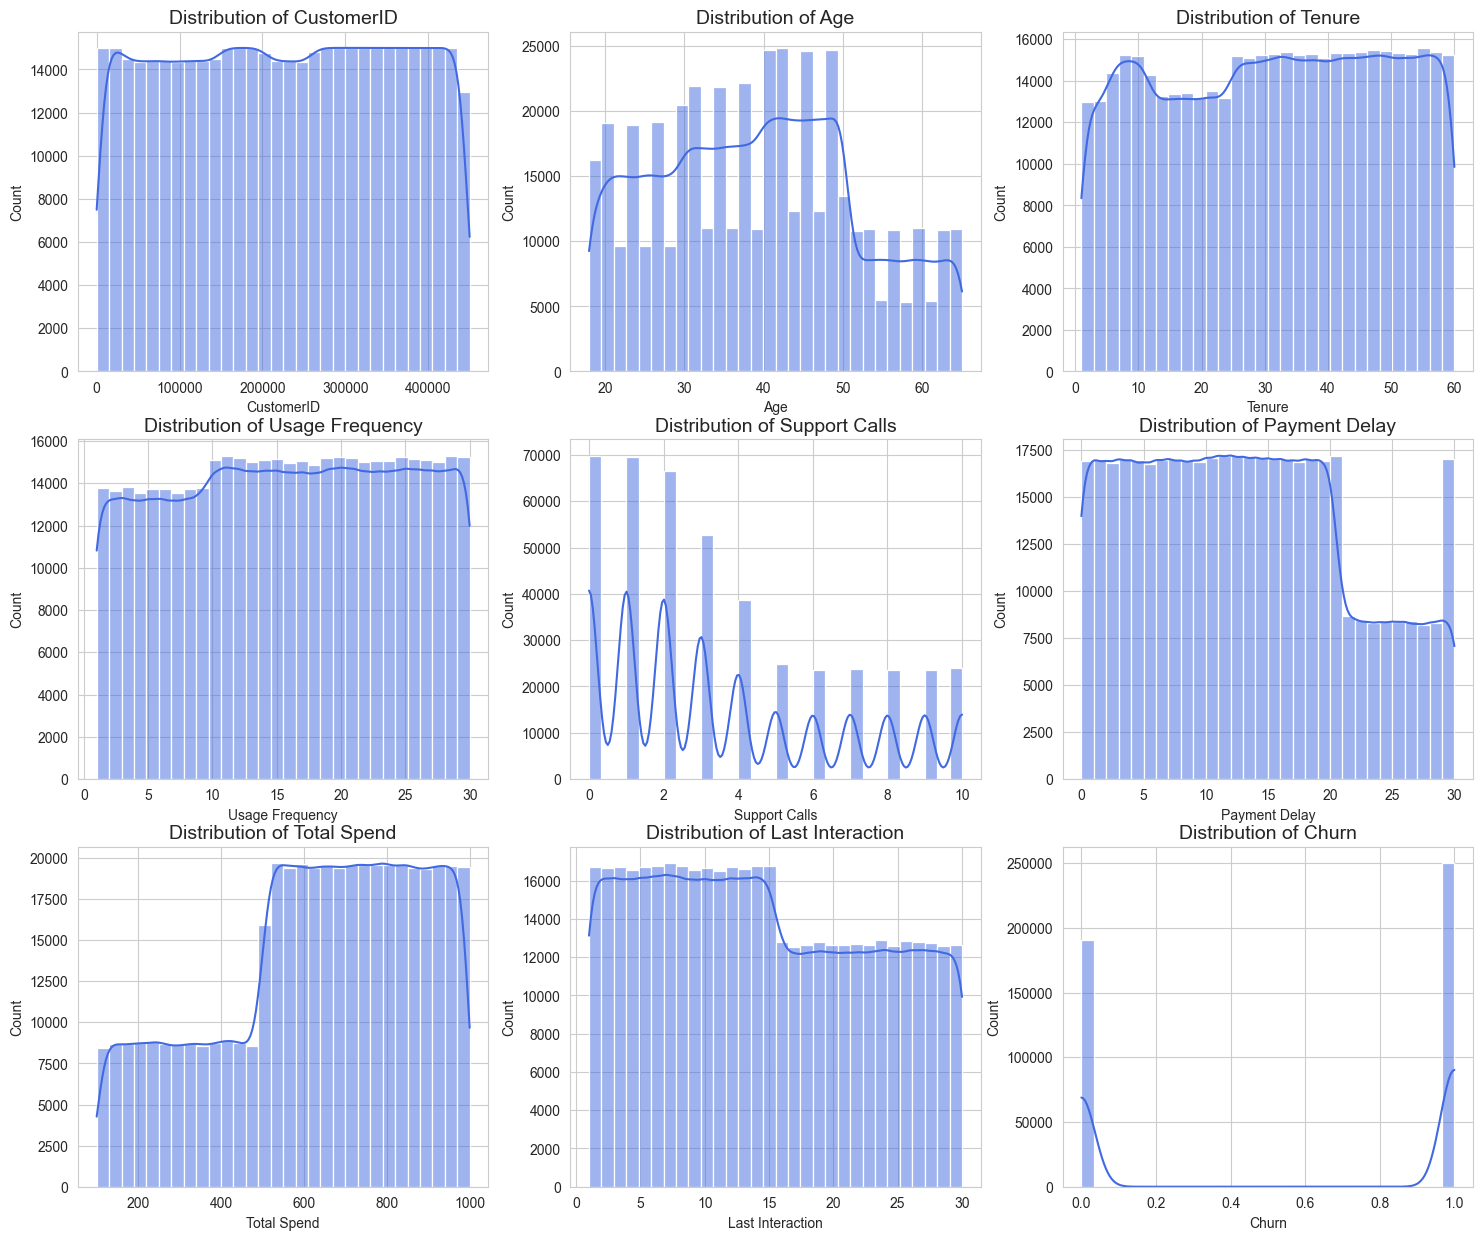

In [17]:
#Histograms for Numeric Columns
num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 3) 

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, color='royalblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

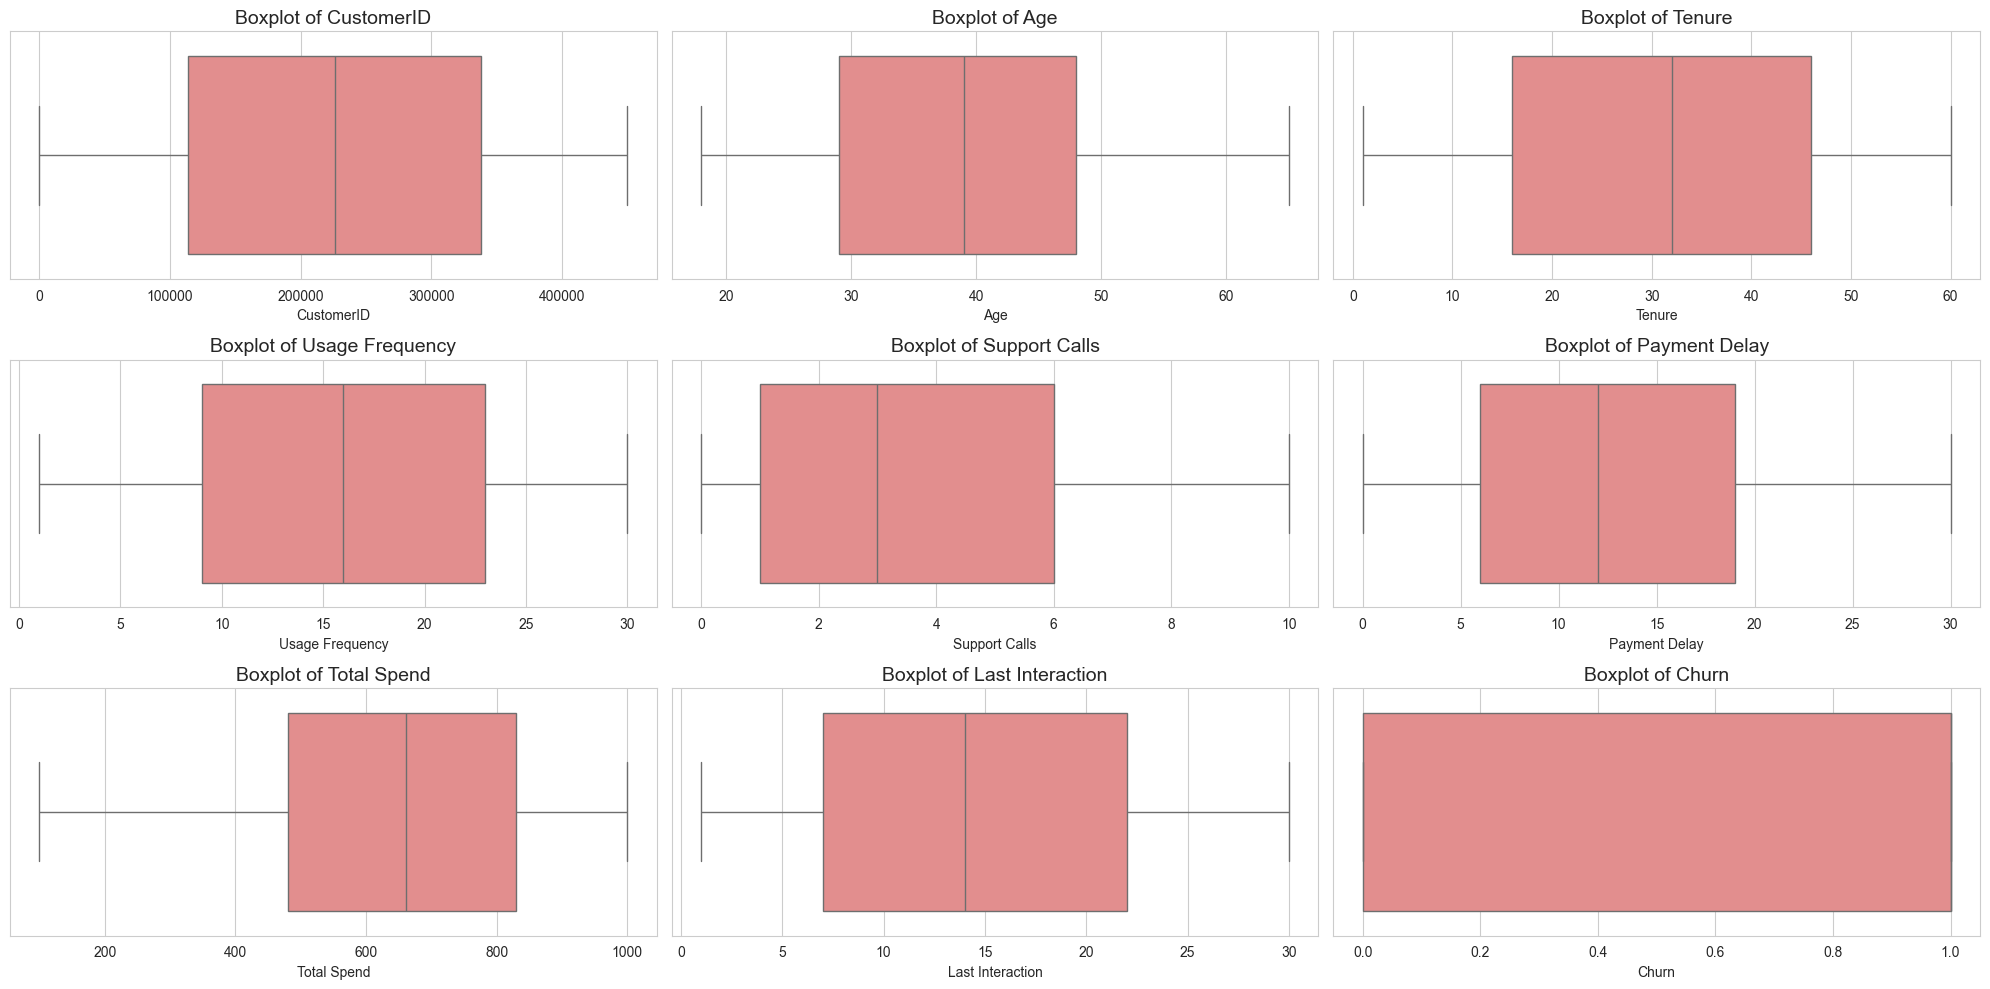

In [18]:
#Boxplots to Check Outliers
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}', fontsize=14)

plt.tight_layout()
plt.show()

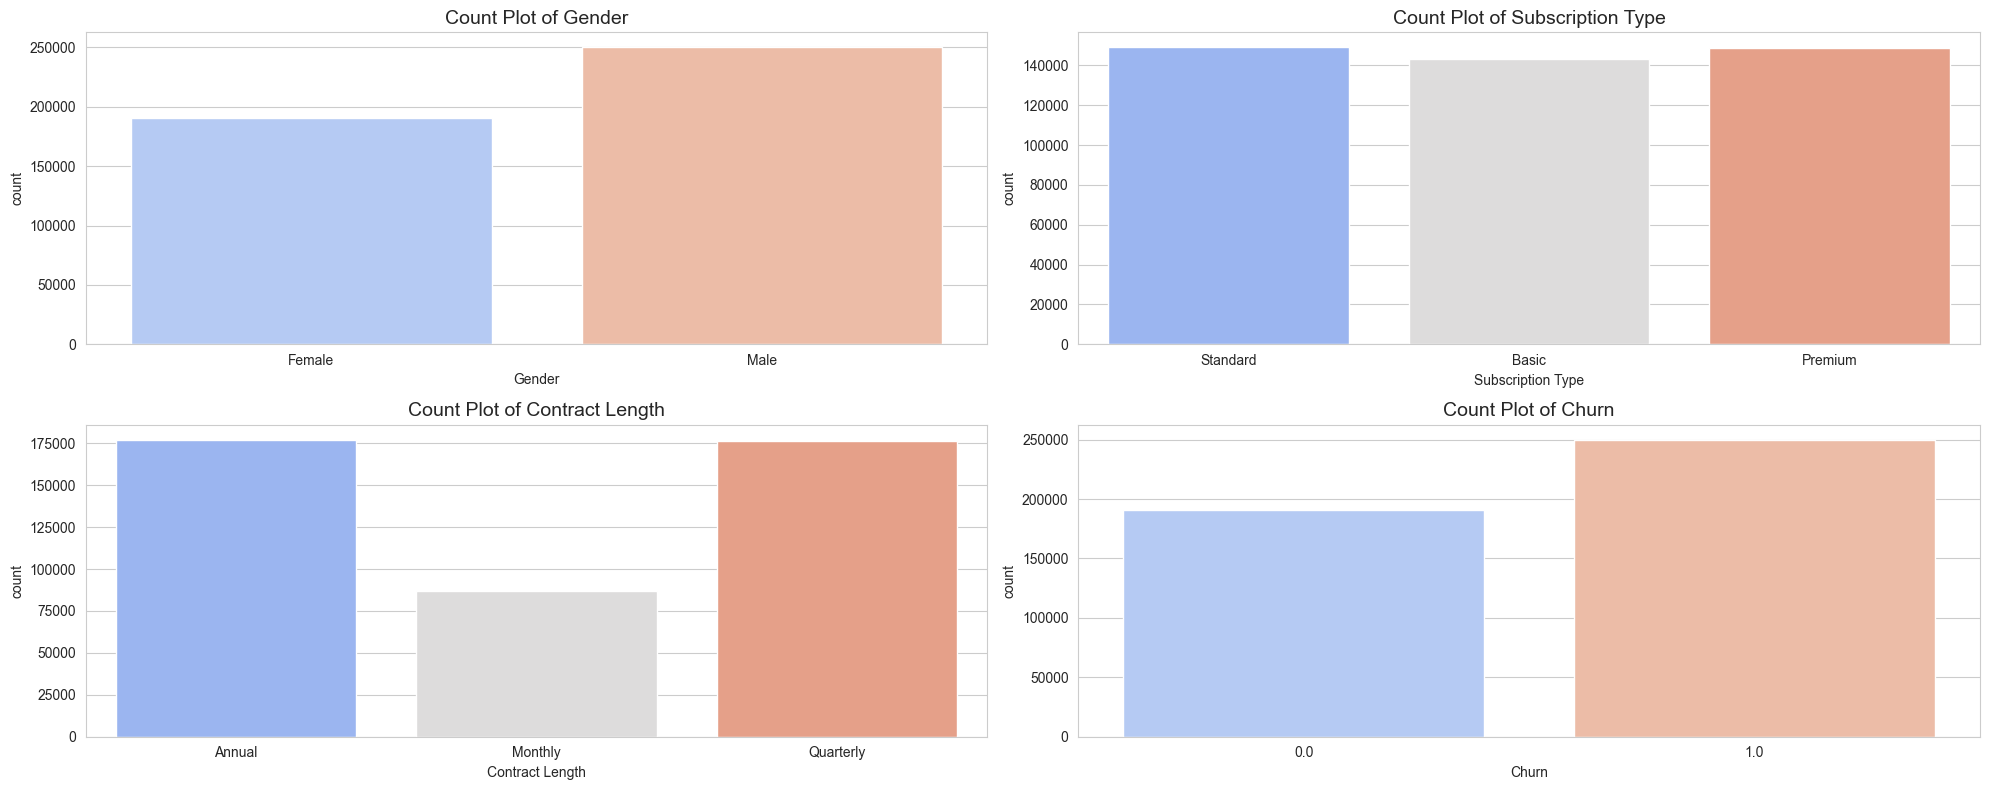

In [19]:
#Count Plots for Categorical Variables
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length', 'Churn']
plt.figure(figsize=(20, 8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], palette='coolwarm')
    plt.title(f'Count Plot of {col}', fontsize=14)

plt.tight_layout()
plt.show()

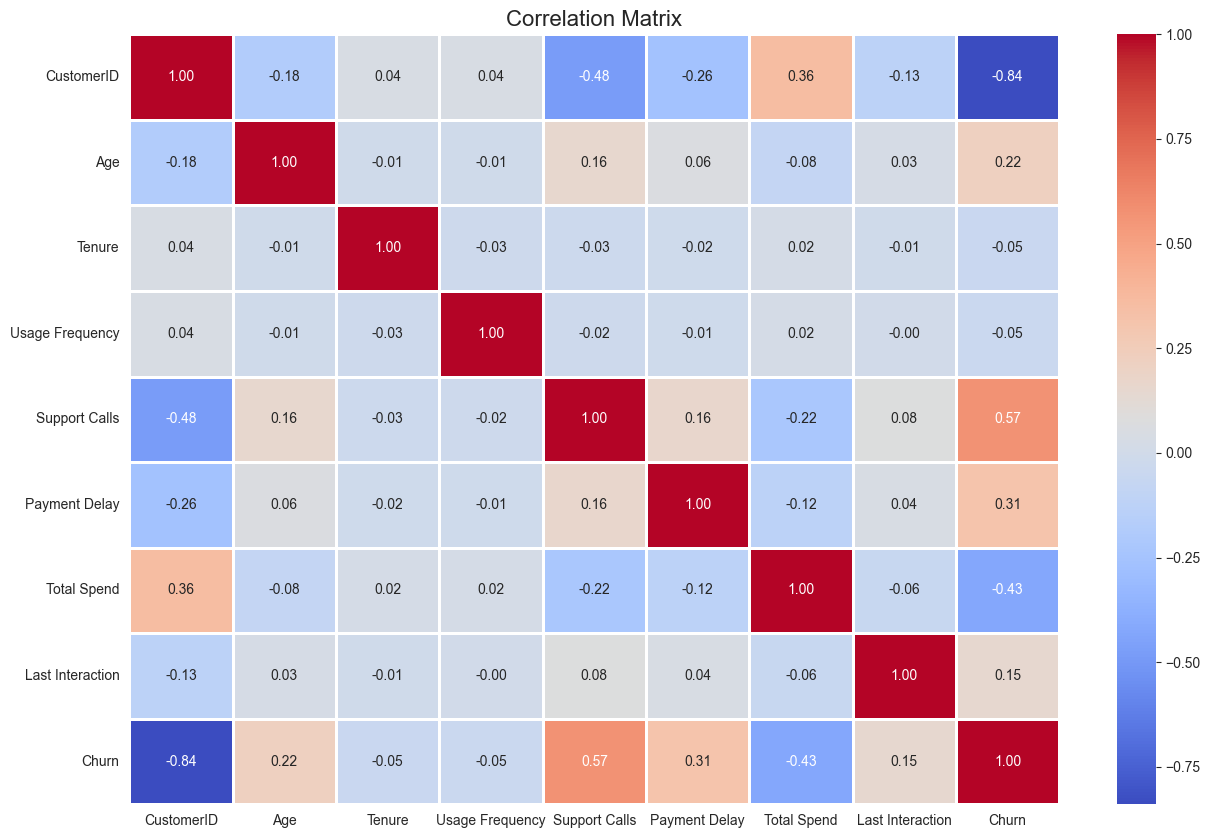

In [20]:
#Correlation Heatmap 
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=1, fmt='.2f')
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# Analysis of the Correlation Matrix & Boxplots  

##  Correlation Matrix Analysis  

###  Strong Positive Correlations:  
- **Churn & Support Calls (0.57):**  
  - Customers who make more support calls tend to have a higher churn rate.  
- **Churn & Payment Delay (0.31):**  
  - Delayed payments are associated with higher churn.  

###  Strong Negative Correlations:  
- **Total Spend & Churn (-0.43):**  
  - Higher spending customers are less likely to churn.  

###  Weak Correlations:  
- **Tenure, Usage Frequency, and Age** don’t have strong correlations with churn.  

---

##  Boxplot Analysis (Outliers)  

- **No extreme outliers:** The distributions appear to be well spread, meaning no need for significant outlier removal.  
- **Support Calls:** Slight skewness towards higher values.  
- **Payment Delay:** No extreme outliers, but some customers have significantly higher delays.  

---

**Conclusion:** The correlation matrix and boxplots suggest that Support Calls, Payment Delay, and Total Spend are key variables influencing churn.  


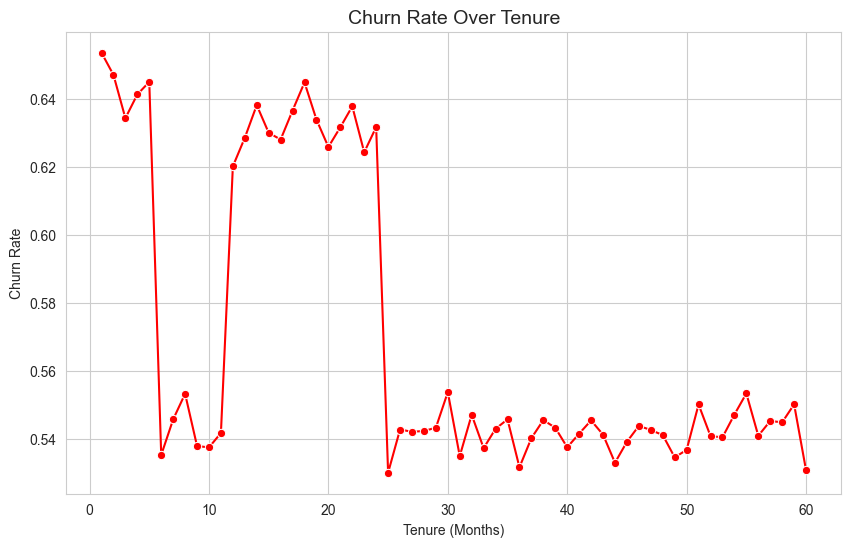

In [21]:
tenure_churn = df.groupby("Tenure")["Churn"].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=tenure_churn.index, y=tenure_churn.values, marker="o", color="red")
plt.title("Churn Rate Over Tenure", fontsize=14)
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.show()

#  Analysis of Churn Rate Over Tenure  

##  Key Observations  

### High churn rate at the start:  
- The churn rate is **very high** for new customers (tenure close to 0 months).  
- This suggests that many customers leave early, possibly due to:  
  - Dissatisfaction  
  - Unmet expectations  
  - Difficulty in the onboarding process  

###  Sudden drop in churn (5-10 months):  
- There is a **sharp decrease** in churn after the first few months.  
- This could indicate that customers who stay beyond the initial period are more likely to continue their subscription.  
- Possible reasons:  
  - Contract terms  
  - Promotions  
  - Habit formation  

###  Churn spikes again (15-25 months):  
- After the drop, the **churn rate rises again** significantly around the **15–25 month mark**.  
- Possible reasons:  
  - Subscription plans expiring  
  - Customers reassessing their needs after a year or two  

###  Long-term customers have a stable churn rate (30+ months):  
- After **30 months**, churn **fluctuates slightly** but remains relatively low.  
- This suggests that **long-term customers are more loyal** and less likely to leave.  

---

##  Possible Business Insights & Actions  

### Improve early retention strategies:  
- Since churn is highest in the first few months, focus on:  
  - **Onboarding enhancements**  
  - **Better customer support**  
  - **Incentives for new customers**  
- Ideas:  
  - Offer **first-month discounts**  
  - Provide **tutorials or guides**  
  - Implement **loyalty bonuses**  

###  Investigate mid-term churn (15-25 months):  
- High churn in this period suggests issues with:  
  - **Contract renewals**  
  - **Pricing changes**  
  - **Lack of engagement**  
- Possible solutions:  
  - **Loyalty rewards**  
  - **Better customer service**  
  - **Personalized retention offers**  

###  Strengthen loyalty for long-term users:  
- Since churn is lower after **30+ months**, it makes sense to:  
  - **Reward loyal customers**  
  - **Offer exclusive discounts or premium features**  

---

 **Conclusion:** Understanding tenure-based churn patterns can help optimize retention strategies at different customer lifecycle stages.   


In [22]:
# Categorizing Tenure
def categorize_tenure(tenure):
    if tenure <= 6:
        return "New (≤6 months)"
    elif 6 < tenure <= 12:
        return "Short-term (6-12 months)"
    elif 12 < tenure <= 36:
        return "Mid-term (1-3 years)"
    else:
        return "Long-term (>3 years)"

df["Tenure_Category"] = df["Tenure"].apply(categorize_tenure)

# Checking the transformed dataset
df[["Tenure", "Tenure_Category"]].head(5)

,Tenure,Tenure_Category
0,39.0,Long-term (>3 years)
1,49.0,Long-term (>3 years)
2,14.0,Mid-term (1-3 years)
3,38.0,Long-term (>3 years)
4,32.0,Mid-term (1-3 years)


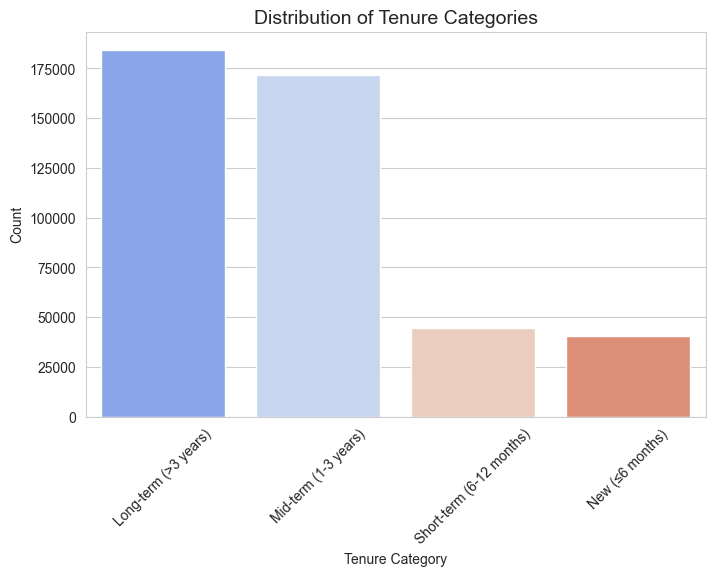

In [23]:
#Tenure Category Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Tenure_Category', data=df, palette='coolwarm')
plt.title('Distribution of Tenure Categories', fontsize=14)
plt.xlabel('Tenure Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Define feature categories
numerical_features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
categorical_features = ['Tenure_Category', 'Gender', 'Subscription Type', 'Contract Length']

# One-Hot Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df[categorical_features])

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Target Variable
y = df['Churn']

# Apply Chi-Square Test
chi2_scores, p_values = chi2(X_encoded, y)

# Store results in a DataFrame
chi2_results = pd.DataFrame({'Feature': X_encoded.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values})

# Select features with p-value < 0.05 (statistically significant)
selected_features = chi2_results[chi2_results['p-value'] < 0.05]

In [25]:
# Display results
print("Selected Features based on Chi-Square Test:")
print(selected_features)

Selected Features based on Chi-Square Test:
                                    Feature    Chi2 Score        p-value
0      Tenure_Category_Mid-term (1-3 years)    197.229409   8.403448e-45
1           Tenure_Category_New (≤6 months)    523.659362  6.767131e-116
2  Tenure_Category_Short-term (6-12 months)     28.099486   1.152364e-07
3                               Gender_Male   5862.870662   0.000000e+00
4                 Subscription Type_Premium     35.815969   2.168631e-09
5                Subscription Type_Standard     24.940958   5.911312e-07
6                   Contract Length_Monthly  66489.536486   0.000000e+00
7                 Contract Length_Quarterly   8209.777736   0.000000e+00


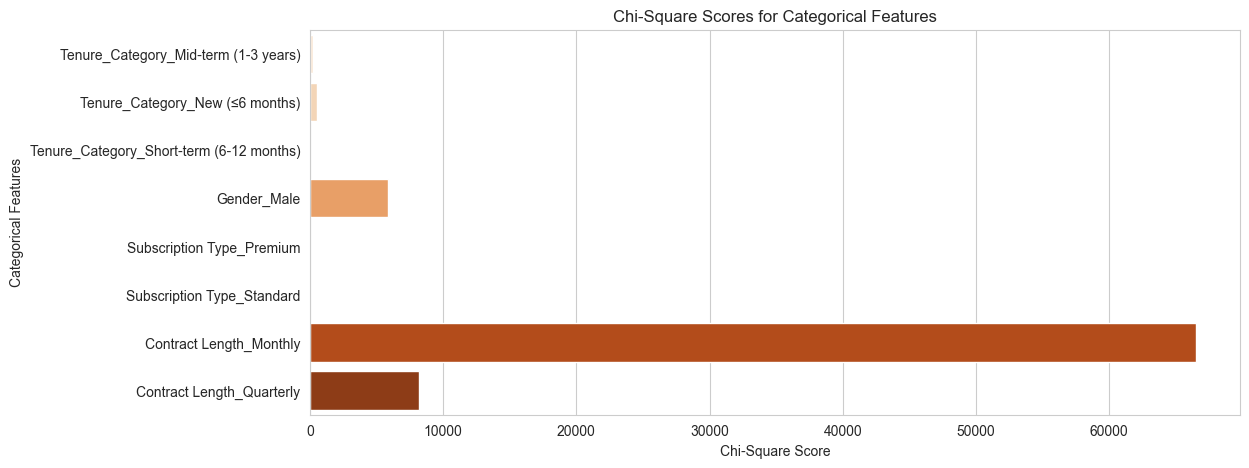

In [26]:
# Plot Chi-Square Scores
plt.figure(figsize=(12, 5))
sns.barplot(x='Chi2 Score', y='Feature', data=selected_features, palette='Oranges')
plt.xlabel('Chi-Square Score')
plt.ylabel('Categorical Features')
plt.title('Chi-Square Scores for Categorical Features')
plt.show()

In [27]:
# Compute Mutual Information
mi_scores = mutual_info_classif(df[numerical_features], df['Churn'], discrete_features=False)

# Create a DataFrame to display results
mi_results = pd.DataFrame({'Feature': numerical_features, 'MI Score': mi_scores})

# Sort features by importance
mi_results = mi_results.sort_values(by='MI Score', ascending=False)

# Display results
print("Selected Features based on Mutual Information:")
print(mi_results)

Selected Features based on Mutual Information:
            Feature  MI Score
5       Total Spend  0.442476
3     Support Calls  0.250014
0               Age  0.129627
4     Payment Delay  0.126128
6  Last Interaction  0.017322
1            Tenure  0.005817
2   Usage Frequency  0.002887


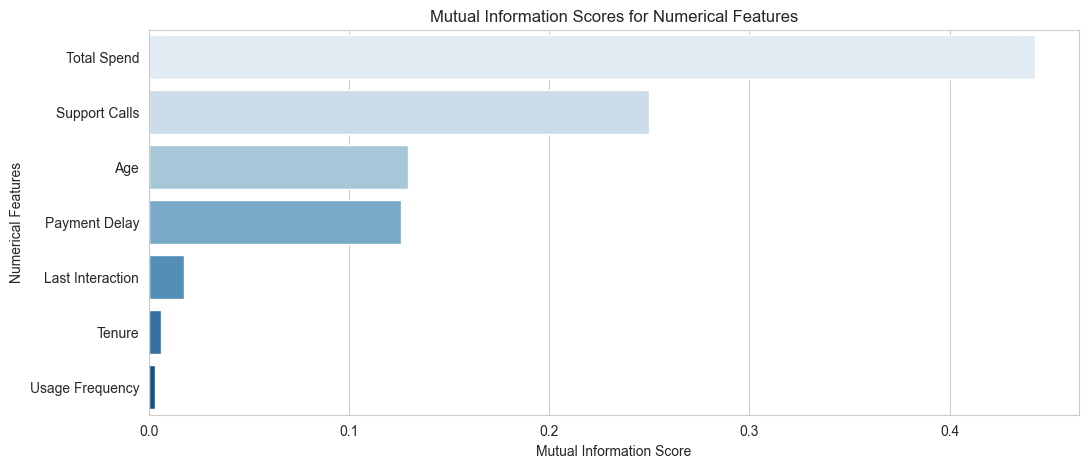

In [28]:
# Plot Mutual Information Scores
plt.figure(figsize=(12, 5))
sns.barplot(x='MI Score', y='Feature', data=mi_results, palette='Blues')
plt.xlabel('Mutual Information Score')
plt.ylabel('Numerical Features')
plt.title('Mutual Information Scores for Numerical Features')
plt.show()

In [29]:
# Define the most important features
selected_features = ['Total Spend', 'Support Calls', 'Age', 'Payment Delay', 'Contract Length', 'Gender', 'Tenure_Category']

# Define transformations
num_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations
preprocessor = ColumnTransformer([
    ('num', num_transformer, ['Total Spend', 'Support Calls', 'Age', 'Payment Delay']),
    ('cat', categorical_transformer, ['Contract Length', 'Gender', 'Tenure_Category'])
])

# Create the new pipeline
final_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [30]:
# Split data
X = df[selected_features]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Define parameter grid for Logistic Regression
param_grid_logreg = {
    'model__C': [0.1, 1, 10, 100],  
    'model__max_iter': [2000, 5000, 10000],  
    'model__penalty': ['l1', 'l2'],  
    'model__solver': ['liblinear', 'saga'],  
    'model__class_weight': [None, 'balanced']  
}

# Build the pipeline
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# GridSearchCV for hyperparameter tuning
grid_logreg = GridSearchCV(
    log_reg_pipeline,
    param_grid_logreg,
    cv=5,  
    scoring='accuracy',  
    n_jobs=-1,  
    verbose=2  
)

grid_logreg.fit(X_train[selected_features], y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END model__C=0.1, model__class_weight=None, model__max_iter=2000, model__penalty=l1, model__solver=liblinear; total time=   4.9s
[CV] END model__C=0.1, model__class_weight=None, model__max_iter=2000, model__penalty=l1, model__solver=saga; total time=   6.8s
[CV] END model__C=0.1, model__class_weight=None, model__max_iter=2000, model__penalty=l1, model__solver=saga; total time=   7.2s
[CV] END model__C=0.1, model__class_weight=None, model__max_iter=2000, model__penalty=l1, model__solver=saga; total time=   7.3s
[CV] END model__C=0.1, model__class_weight=None, model__max_iter=2000, model__penalty=l1, model__solver=liblinear; total time=   8.8s
[CV] END model__C=0.1, model__class_weight=None, model__max_iter=2000, model__penalty=l1, model__solver=liblinear; total time=  10.3s
[CV] END model__C=0.1, model__class_weight=None, model__max_iter=2000, model__penalty=l2, model__solver=liblinear; total time=   4.0s
[CV] END model_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'Spend',
                                                                          'Support '
                                                                          'Calls',
                                                                          'Age',
                                                                          'Payment '
                                                                          'Delay']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Contract '
                                                                          'Length',
                                                                          'Gender',
                                                                          'Tenure_Category'])])),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1, 10, 100],
                         'model__class_weight': [None, 'balanced'],
                         'model__max_iter': [2000, 5000, 10000],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [32]:
# Best model
best_logreg = grid_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test[selected_features])

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_logreg

array([[35320,  2743],
       [ 6760, 43344]])

In [33]:
# Create the DataFrame for comparison
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_logreg
})

# Display the first few rows
comparison.head(10)

,Actual,Predicted
159565,1.0,1.0
127464,1.0,1.0
22398,1.0,0.0
99337,1.0,1.0
300997,0.0,0.0
380840,0.0,0.0
429228,0.0,0.0
395683,0.0,0.0
55619,1.0,1.0
82320,1.0,1.0


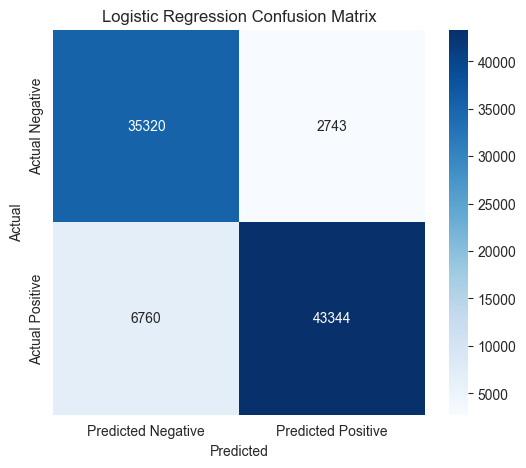

In [34]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
# Performance Report
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Best Hyperparameters:", grid_logreg.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88     38063
         1.0       0.94      0.87      0.90     50104

    accuracy                           0.89     88167
   macro avg       0.89      0.90      0.89     88167
weighted avg       0.90      0.89      0.89     88167

Best Hyperparameters: {'model__C': 100, 'model__class_weight': 'balanced', 'model__max_iter': 10000, 'model__penalty': 'l1', 'model__solver': 'saga'}
Accuracy: 0.8922159084464709


In [36]:
# Define parameter grid for Decision Tree
param_grid_dt = {
    'model__criterion': ['gini', 'entropy'],  
    'model__max_depth': [3, 5, 10],  
    'model__min_samples_split': [2, 5, 10],  
    'model__min_samples_leaf': [1, 2, 5, 10]
}

# Build the pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

# GridSearchCV for hyperparameter tuning
grid_dt =  GridSearchCV(
    dt_pipeline,
    param_grid_dt,
    cv=5,  
    scoring='accuracy',  
    n_jobs=-1,  
    verbose=2  
)

grid_dt.fit(X_train[selected_features], y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=2; total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=5; total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=5; total time=   1.2s
[CV] END model__criterion=gini, model__max_depth=3, mode

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'Spend',
                                                                          'Support '
                                                                          'Calls',
                                                                          'Age',
                                                                          'Payment '
                                                                          'Delay']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Contract '
                                                                          'Length',
                                                                          'Gender',
                                                                          'Tenure_Category'])])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [3, 5, 10],
                         'model__min_samples_leaf': [1, 2, 5, 10],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [37]:
# Best model
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test[selected_features])

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[38062,     1],
       [ 1060, 49044]])

In [38]:
# Create the DataFrame for comparison
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_dt
})

# Display the first few rows
comparison.head(10)

,Actual,Predicted
159565,1.0,1.0
127464,1.0,1.0
22398,1.0,1.0
99337,1.0,1.0
300997,0.0,0.0
380840,0.0,0.0
429228,0.0,0.0
395683,0.0,0.0
55619,1.0,1.0
82320,1.0,1.0


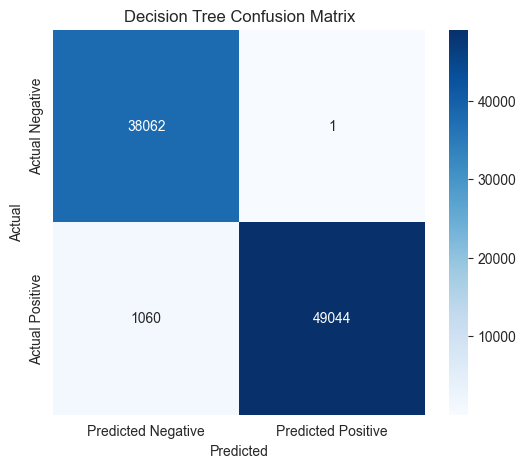

In [39]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
# Performance Report
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Best Hyperparameters:", grid_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

Best Hyperparameters: {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
Accuracy: 0.9879660190320642


In [41]:
# Predictions on training and test data
y_train_pred = best_dt.predict(X_train[selected_features])
y_test_pred = best_dt.predict(X_test[selected_features])

# Compute accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f" Training Accuracy: {train_acc:.4f}")
print(f" Test Accuracy: {test_acc:.4f}")

 Training Accuracy: 0.9882
 Test Accuracy: 0.9880


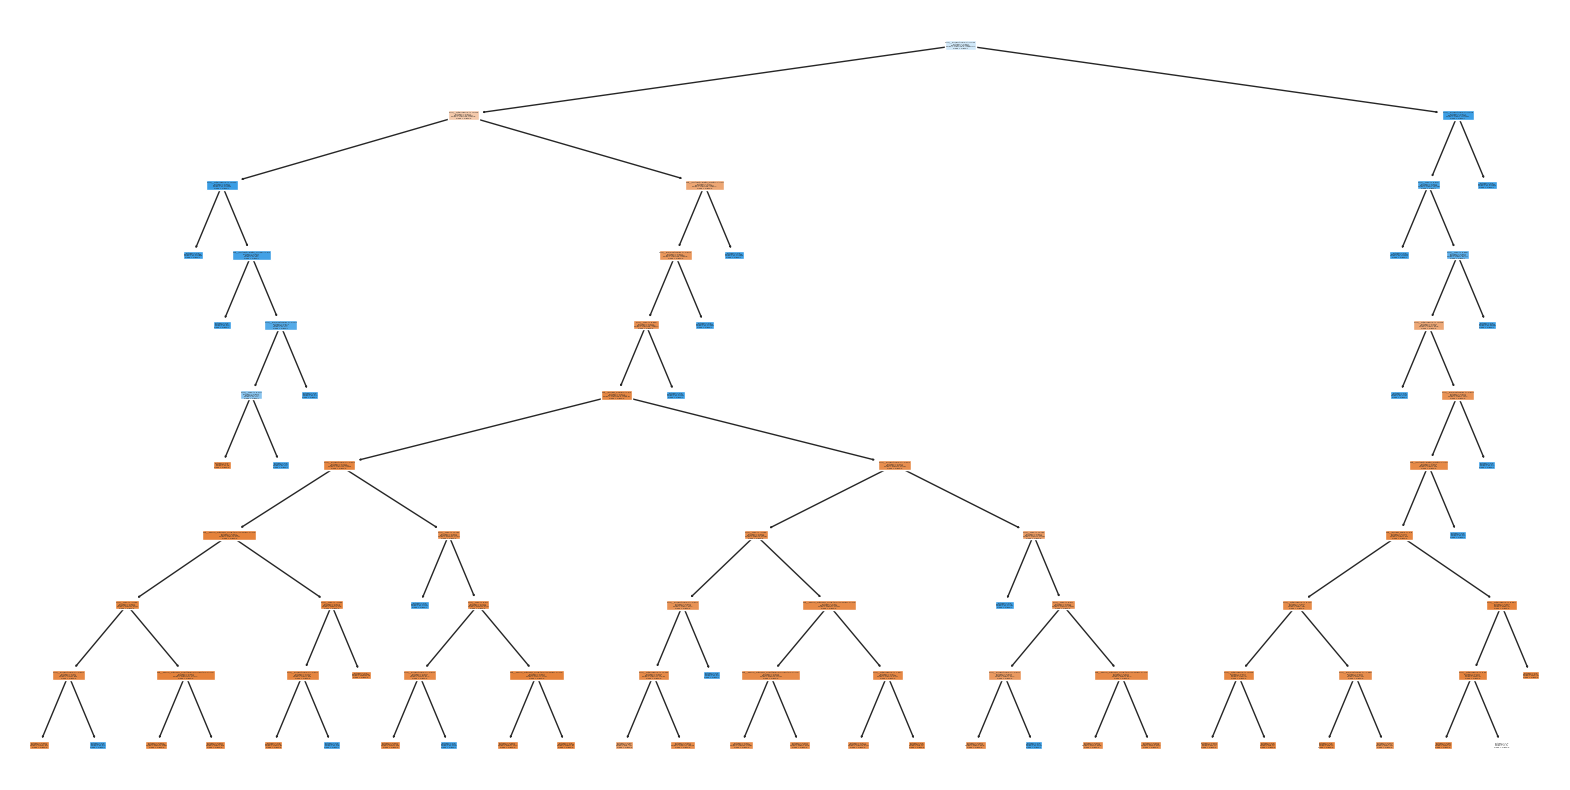

In [42]:
# Extract the fitted preprocessor from the pipeline
fitted_preprocessor = best_dt.named_steps["preprocessor"]

# Get transformed feature names
feature_names = fitted_preprocessor.get_feature_names_out()


# Extract the DecisionTreeClassifier from the pipeline
dt_model = best_dt.named_steps["model"] 

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=feature_names, class_names=["Class 0", "Class 1"])
plt.show()

In [43]:
# Define parameter grid for SVM
param_grid_nb = {
    'model__var_smoothing': [1e-12, 1e-10, 1e-9, 1e-8, 1e-6, 1e-4, 1e-2]
}

# Build the pipeline
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GaussianNB())
])

# GridSearchCV for hyperparameter tuning
grid_nb = GridSearchCV(
    nb_pipeline,
    param_grid_nb,
    cv=3,  
    scoring='accuracy',  
    n_jobs=-1,  
    verbose=2  
)

grid_nb.fit(X_train[selected_features], y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END .........................model__var_smoothing=1e-12; total time=   0.7s
[CV] END .........................model__var_smoothing=1e-12; total time=   0.7s
[CV] END .........................model__var_smoothing=1e-12; total time=   0.8s
[CV] END .........................model__var_smoothing=1e-10; total time=   0.8s
[CV] END .........................model__var_smoothing=1e-10; total time=   0.8s
[CV] END .........................model__var_smoothing=1e-10; total time=   0.8s
[CV] END .........................model__var_smoothing=1e-09; total time=   0.8s
[CV] END .........................model__var_smoothing=1e-09; total time=   0.9s
[CV] END .........................model__var_smoothing=1e-09; total time=   0.9s
[CV] END .........................model__var_smoothing=1e-08; total time=   0.9s
[CV] END .........................model__var_smoothing=1e-08; total time=   0.9s
[CV] END .........................model__var_smoo

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Total '
                                                                          'Spend',
                                                                          'Support '
                                                                          'Calls',
                                                                          'Age',
                                                                          'Payment '
                                                                          'Delay']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Contract '
                                                                          'Length',
                                                                          'Gender',
                                                                          'Tenure_Category'])])),
                                       ('model', GaussianNB())]),
             n_jobs=-1,
             param_grid={'model__var_smoothing': [1e-12, 1e-10, 1e-09, 1e-08,
                                                  1e-06, 0.0001, 0.01]},
             scoring='accuracy', verbose=2)

In [44]:
# Best parameters and score
print(f"Best Naïve Bayes Parameters: {grid_nb.best_params_}")
print(f"Best Accuracy: {grid_nb.best_score_:.4f}\n")

# Evaluate on test set
y_pred_nb = grid_nb.best_estimator_.predict(X_test[selected_features])
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_nb

Best Naïve Bayes Parameters: {'model__var_smoothing': 0.01}
Best Accuracy: 0.9138



array([[37759,   304],
       [ 7192, 42912]])

In [45]:
# Create the DataFrame for comparison
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_nb
})

# Display the first few rows
comparison.head(10)

,Actual,Predicted
159565,1.0,1.0
127464,1.0,1.0
22398,1.0,0.0
99337,1.0,1.0
300997,0.0,0.0
380840,0.0,0.0
429228,0.0,0.0
395683,0.0,0.0
55619,1.0,1.0
82320,1.0,1.0


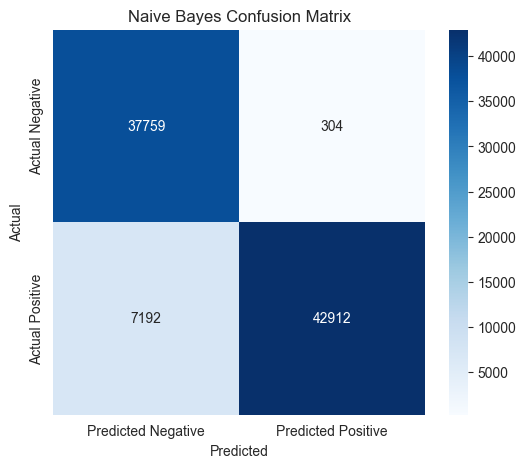

In [46]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
# Classification Report
print("Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}\n")

Naive Bayes Performance:
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91     38063
         1.0       0.99      0.86      0.92     50104

    accuracy                           0.91     88167
   macro avg       0.92      0.92      0.91     88167
weighted avg       0.93      0.91      0.92     88167

Test Accuracy: 0.9150



# Model Comparison Summary

## 1. Naive Bayes  
**Confusion Matrix:**  
- True Negatives: 37759  
- False Positives: 304 
- False Negatives: 7192 
- True Positives: 42915  

**Performance Metrics:**  
- **Accuracy:** 91.5%  
- **Precision:**  
  - Class 0: 0.84  
  - Class 1: 0.99  
- **Recall:**  
  - Class 0: 0.99 
  - Class 1: 0.86  
- **F1-score:**  
  - Class 0: 0.91  
  - Class 1: 0.92  

## 2. Decision Tree  
**Confusion Matrix:**  
- True Negatives: 38062  
- False Positives: 1  
- False Negatives: 1060  
- True Positives: 49044  

**Performance Metrics:**  
- **Accuracy:** 98.79%  
- **Precision:**  
  - Class 0: 0.97  
  - Class 1: 1.00  
- **Recall:**  
  - Class 0: 1.00  
  - Class 1: 0.98  
- **F1-score:**  
  - Class 0: 0.99  
  - Class 1: 0.99  

## 3. Logistic Regression  
**Confusion Matrix:**  
- True Negatives: 35320  
- False Positives: 2743  
- False Negatives: 6760  
- True Positives: 43344  

**Performance Metrics:**  
- **Accuracy:** 89.22%  
- **Precision:**  
  - Class 0: 0.84  
  - Class 1: 0.94  
- **Recall:**  
  - Class 0: 0.93  
  - Class 1: 0.87  
- **F1-score:**  
  - Class 0: 0.86  
  - Class 1: 0.90  



In [50]:
# Define the base models
base_models = [
    ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=42)),
    ('nb', GaussianNB())
]

# Define the meta model (Logistic Regression)
meta_model = LogisticRegression(C=100, class_weight='balanced', max_iter=10000, penalty='l1', solver='saga', random_state=42)

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,  
    cv=5,
    n_jobs=-1
)

# Train the stacking classifier using the pipeline
stacking_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', stacking_clf)
])


In [51]:
# Fit the model
stacking_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Total Spend',
                                                   'Support Calls', 'Age',
                                                   'Payment Delay']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Contract Length', 'Gender',
                                                   'Tenure_Category'])])),
                ('model',
                 StackingClassifier(cv=5,
                                    estimators=[('dt',
                                                 DecisionTreeClassifier(criterion='entropy',
                                                                        max_depth=10,
                                                                        min_samples_leaf=2,
                                                                        random_state=42)),
                                                ('nb', GaussianNB())],
                                    final_estimator=LogisticRegression(C=100,
                                                                       class_weight='balanced',
                                                                       max_iter=10000,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='saga'),
                                    n_jobs=-1, passthrough=True))])

In [52]:
# Evaluate the model
y_pred = stacking_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Stacking Model Accuracy: {accuracy:.4f}")

Stacking Model Accuracy: 0.9880


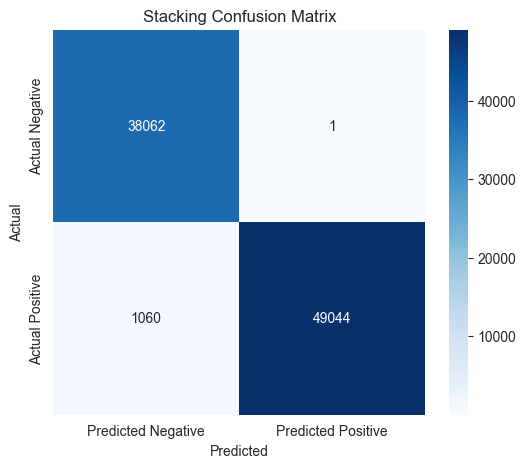

In [53]:
cm_sta = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_sta, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Stacking Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
# Performance Report
print("Stacking Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Stacking Performance:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167

Accuracy: 0.9879660190320642


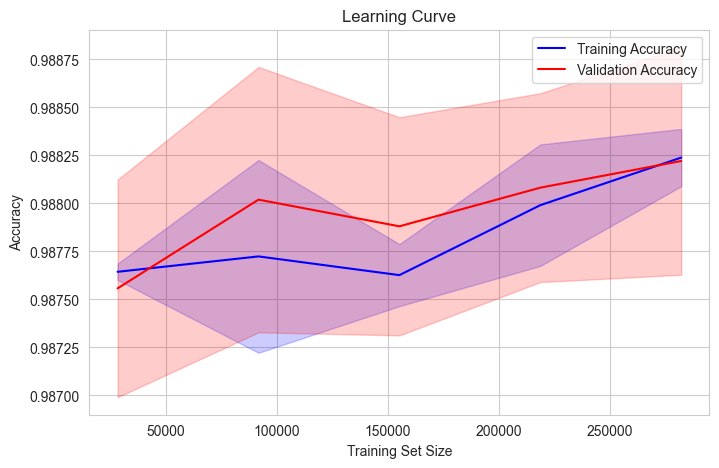

In [55]:

train_sizes, train_scores, test_scores = learning_curve(stacking_pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [56]:
# Save the stacking pipeline 
joblib.dump(stacking_pipeline, "stacking_model.pkl")

['stacking_model.pkl']